In [23]:
#Imports
from src import (
    import_and_preprocess_weekly_data,
    import_and_preprocess_schedule_data,
    calculate_fantasy_points,
    calculate_fp_averages,
    calculate_def_vs_pos,
    determine_is_home,
    calculate_weekly_offensive_points_and_averages,
    calculate_implied_team_totals,
    calculate_vegas_data,
    check_data
)

In [24]:
seasons = list(range(2018, 2024))
# seasons = list(range(2000, 2024))

weekly_data = import_and_preprocess_weekly_data(seasons)

check_data(weekly_data, "After laoding weekly data")

Downcasting floats.
After laoding weekly data
Shape: (28790, 53)
Missing Values:
player_id                          0
player_name                        0
player_display_name                0
position                           0
position_group                     0
headshot_url                      35
recent_team                        0
season                             0
week                               0
season_type                        0
opponent_team                      0
completions                        0
attempts                           0
passing_yards                      0
passing_tds                        0
interceptions                      0
sacks                              0
sack_yards                         0
sack_fumbles                       0
sack_fumbles_lost                  0
passing_air_yards                  0
passing_yards_after_catch          0
passing_first_downs                0
passing_epa                    25185
passing_2pt_conversions        

In [25]:
weekly_data = calculate_fantasy_points(weekly_data) 
check_data(weekly_data, "After calculating fantasy points")

After calculating fantasy points
Shape: (28790, 54)
Missing Values:
player_id                          0
player_name                        0
player_display_name                0
position                           0
position_group                     0
headshot_url                      35
recent_team                        0
season                             0
week                               0
season_type                        0
opponent_team                      0
completions                        0
attempts                           0
passing_yards                      0
passing_tds                        0
interceptions                      0
sacks                              0
sack_yards                         0
sack_fumbles                       0
sack_fumbles_lost                  0
passing_air_yards                  0
passing_yards_after_catch          0
passing_first_downs                0
passing_epa                    25185
passing_2pt_conversions            0
pacr   

In [26]:
weekly_data = calculate_fp_averages(weekly_data)

check_data(weekly_data, "After calculating fantasy point averages")


After calculating fantasy point averages
Shape: (28790, 59)
Missing Values:
player_id                          0
player_name                        0
player_display_name                0
position                           0
position_group                     0
headshot_url                      35
recent_team                        0
season                             0
week                               0
season_type                        0
opponent_team                      0
completions                        0
attempts                           0
passing_yards                      0
passing_tds                        0
interceptions                      0
sacks                              0
sack_yards                         0
sack_fumbles                       0
sack_fumbles_lost                  0
passing_air_yards                  0
passing_yards_after_catch          0
passing_first_downs                0
passing_epa                    25185
passing_2pt_conversions            0

In [27]:
weekly_data = calculate_def_vs_pos(weekly_data)

check_data(weekly_data, "After calculating defense vs position")

After calculating defense vs position
Shape: (28790, 60)
Missing Values:
player_id                          0
player_name                        0
player_display_name                0
position                           0
position_group                     0
headshot_url                      35
recent_team                        0
season                             0
week                               0
season_type                        0
opponent_team                      0
completions                        0
attempts                           0
passing_yards                      0
passing_tds                        0
interceptions                      0
sacks                              0
sack_yards                         0
sack_fumbles                       0
sack_fumbles_lost                  0
passing_air_yards                  0
passing_yards_after_catch          0
passing_first_downs                0
passing_epa                    25185
passing_2pt_conversions            0
pa

In [28]:
# Load regular season schedule
schedule = import_and_preprocess_schedule_data(seasons)

# determine if a player is playing at home or away
weekly_data = determine_is_home(weekly_data, schedule)
check_data(weekly_data, "After determining home/away status")

After determining home/away status
Shape: (28790, 61)
Missing Values:
player_id                 0
player_name               0
player_display_name       0
position                  0
position_group            0
                       ... 
dk_fp_last3            1168
dk_fp_last5            1168
is_rookie                 0
defense_vs_pos            0
home                      0
Length: 61, dtype: int64
    player_id player_name player_display_name position position_group  \
0  00-0019596     T.Brady           Tom Brady       QB             QB   
1  00-0019596     T.Brady           Tom Brady       QB             QB   
2  00-0019596     T.Brady           Tom Brady       QB             QB   
3  00-0019596     T.Brady           Tom Brady       QB             QB   
4  00-0019596     T.Brady           Tom Brady       QB             QB   

                                        headshot_url recent_team  season  \
0  https://static.www.nfl.com/image/private/f_aut...          NE    2018   
1  htt

In [29]:
vegas_data = calculate_vegas_data(schedule)
check_data(vegas_data, "After calculating vegas data")

After calculating vegas data
Shape: (1583, 12)
Missing Values:
season                     0
week                       0
home_team                  0
away_team                  0
total_line                 0
spread_line                0
implied_home_total         0
implied_away_total         0
home_avg_score             0
away_avg_score             0
home_implied_total_diff    0
away_implied_total_diff    0
dtype: int64
   season  week home_team away_team  total_line  spread_line  \
0    2018     1       PHI       ATL        44.5          1.0   
1    2018     1       BAL       BUF        39.0          7.5   
2    2018     1       CLE       PIT        41.0         -3.5   
3    2018     1       IND       CIN        47.5         -1.0   
4    2018     1       MIA       TEN        43.5         -1.0   

   implied_home_total  implied_away_total  home_avg_score  away_avg_score  \
0               22.75               21.75           23.37           23.37   
1               23.25               1

In [30]:

# merge implied_total_diff with player data
# if home = True, use home_implied_total_diff, else use away_implied_total_diff
weekly_data = weekly_data.merge(
    vegas_data[['season', 'week', 'home_team', 'implied_home_total', 'home_implied_total_diff']],
    left_on=['season', 'week', 'recent_team'],
    right_on=['season', 'week', 'home_team'],
    how='left'
).merge(
    vegas_data[['season', 'week', 'away_team', 'implied_away_total', 'away_implied_total_diff']],
    left_on=['season', 'week', 'recent_team'],
    right_on=['season', 'week', 'away_team'],
    how='left'
)

# use home_implied_total_diff if home = True, else use away_implied_total_diff
weekly_data['implied_total_diff'] = weekly_data['home_implied_total_diff']
weekly_data.loc[~weekly_data['home'], 'implied_total_diff'] = weekly_data['away_implied_total_diff']

# use implied_home_total if home = True, else use implied_away_total
weekly_data['implied_team_total'] = weekly_data['implied_home_total'] 
weekly_data.loc[~weekly_data['home'], 'implied_team_total'] = weekly_data['implied_away_total']

# clean up redundant columns
weekly_data.drop(columns=['home_team', 'away_team', 'home_implied_total_diff', 'away_implied_total_diff', 'implied_home_total', 'implied_away_total'], inplace=True)
check_data(weekly_data, "After merging vegas data with player data")



After merging vegas data with player data
Shape: (28790, 63)
Missing Values:
player_id              0
player_name            0
player_display_name    0
position               0
position_group         0
                      ..
is_rookie              0
defense_vs_pos         0
home                   0
implied_total_diff     0
implied_team_total     0
Length: 63, dtype: int64
    player_id player_name player_display_name position position_group  \
0  00-0019596     T.Brady           Tom Brady       QB             QB   
1  00-0019596     T.Brady           Tom Brady       QB             QB   
2  00-0019596     T.Brady           Tom Brady       QB             QB   
3  00-0019596     T.Brady           Tom Brady       QB             QB   
4  00-0019596     T.Brady           Tom Brady       QB             QB   

                                        headshot_url recent_team  season  \
0  https://static.www.nfl.com/image/private/f_aut...          NE    2018   
1  https://static.www.nfl.com/im

In [31]:
RUSHING_COLS = [ 'carries', 'rushing_yards', 
               'passing_2pt_conversions', 'rushing_tds',
              'rushing_first_downs', 'rushing_epa']
DEFAULT_COLS = ['player_id', 'player_display_name', 'week', 'season', 'defense_vs_pos', 
                   'implied_total_diff', 'implied_team_total', 'dk_fp', 'dk_fp_avg', 'dk_fp_last1', 'dk_fp_last3', 'dk_fp_last5', 'is_rookie']
PASSING_COLS = ['completions', 'attempts', 'passing_yards', 'passing_tds', 'interceptions', 'sacks', 'sack_yards',
              'passing_air_yards', 'passing_yards_after_catch', 'passing_epa', 'pacr', 'dakota', 'passing_first_downs']
QB_COLS = DEFAULT_COLS + PASSING_COLS + RUSHING_COLS
qb_data = weekly_data.loc[weekly_data['position'] == 'QB']
qb_data = qb_data[QB_COLS]
check_data(qb_data, "After filtering QB data")
qb_data = qb_data[qb_data['attempts'] > 10]
check_data(qb_data, "After filtering QB data with attempts > 10")
qb_data['rushing_epa'] = qb_data['rushing_epa'].fillna(0)


After filtering QB data
Shape: (3606, 32)
Missing Values:
player_id                      0
player_display_name            0
week                           0
season                         0
defense_vs_pos                 0
implied_total_diff             0
implied_team_total             0
dk_fp                          0
dk_fp_avg                    148
dk_fp_last1                    0
dk_fp_last3                  148
dk_fp_last5                  148
is_rookie                      0
completions                    0
attempts                       0
passing_yards                  0
passing_tds                    0
interceptions                  0
sacks                          0
sack_yards                     0
passing_air_yards              0
passing_yards_after_catch      0
passing_epa                  189
pacr                         208
dakota                       436
passing_first_downs            0
carries                        0
rushing_yards                  0
passing_2pt_conver

In [32]:
# adding some derived columns
qb_data['passing_yards_per_attempt'] = qb_data['passing_yards'] / qb_data['attempts']
qb_data['passing_yards_per_attempt_last5'] = qb_data['passing_yards'].expanding(5).sum() / qb_data['attempts'].expanding(5).sum()

qb_data['passing_tds_per_int'] = qb_data['passing_tds'] / qb_data['interceptions']
# handle divide by zero and nan
qb_data['passing_tds_per_int'] = qb_data['passing_tds_per_int'].replace([float('inf'), float('-inf')], 0)
qb_data['passing_tds_per_int'] = qb_data['passing_tds_per_int'].fillna(0)
qb_data['passing_air_yards_per_attempt'] = qb_data['passing_air_yards'] / qb_data['attempts']
qb_data['passing_air_yards_per_attempt_last5'] = qb_data['passing_air_yards'].expanding(5).sum() / qb_data['attempts'].expanding(5).sum()

qb_data['passing_epa_per_attempt'] = qb_data['passing_epa'] / qb_data['attempts']
qb_data['passing_epa_per_attempt_last5'] = qb_data['passing_epa'].expanding(5).sum() / qb_data['attempts'].expanding(5).sum()

qb_data['rushing_epa_per_carry'] = qb_data['rushing_epa'] / qb_data['carries']
qb_data['rushing_epa_per_carry'] = qb_data['rushing_epa_per_carry'].replace([float('inf'), float('-inf')], 0)
qb_data['rushing_epa_per_carry'] = qb_data['rushing_epa_per_carry'].fillna(0)

qb_data['rushing_tds_per_carry'] = qb_data['rushing_tds'] / qb_data['carries']
qb_data['rushing_tds_per_carry'] = qb_data['rushing_tds_per_carry'].replace([float('inf'), float('-inf')], 0)
qb_data['rushing_tds_per_carry'] = qb_data['rushing_tds_per_carry'].fillna(0)

qb_data['completion_pct'] = qb_data['completions'] / qb_data['attempts']
qb_data['td_pct'] = qb_data['passing_tds'] / qb_data['attempts']
qb_data['td_pct_last5'] = qb_data['passing_tds'].expanding(5).sum() / qb_data['attempts'].expanding(5).sum()

QB_COLS += ['passing_yards_per_attempt', 'passing_yards_per_attempt_last5', 'passing_tds_per_int', 
            'passing_air_yards_per_attempt', 'passing_air_yards_per_attempt_last5',
            'passing_epa_per_attempt', 'completion_pct' 'td_pct', 'td_pct_last5',
            'rushing_epa_per_carry', 'rushing_tds_per_carry']
check_data(qb_data, "After calculating QB stats")

After calculating QB stats
Shape: (3061, 44)
Missing Values:
player_id                               0
player_display_name                     0
week                                    0
season                                  0
defense_vs_pos                          0
implied_total_diff                      0
implied_team_total                      0
dk_fp                                   0
dk_fp_avg                              80
dk_fp_last1                             0
dk_fp_last3                            80
dk_fp_last5                            80
is_rookie                               0
completions                             0
attempts                                0
passing_yards                           0
passing_tds                             0
interceptions                           0
sacks                                   0
sack_yards                              0
passing_air_yards                       0
passing_yards_after_catch               0
passing_epa    

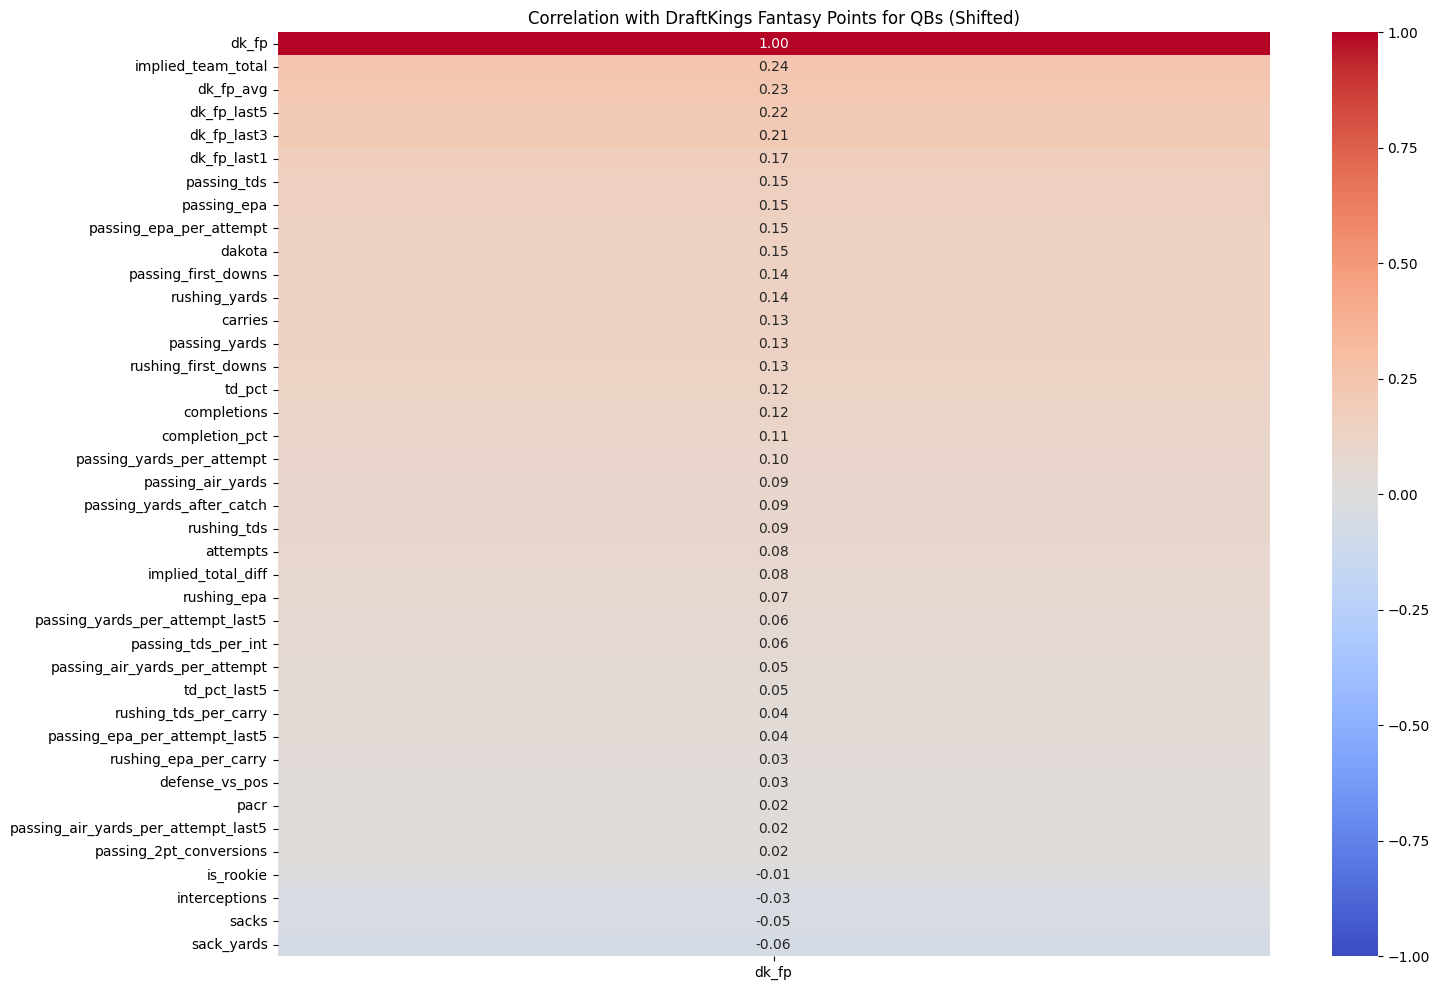

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

dk_fp = qb_data['dk_fp']
qb_features = qb_data.drop(columns=['player_id', 'player_display_name', 'week', 'season', 'dk_fp'])

# shirt all columns except dk_fp
qb_features_shifted = qb_features.shift(1)
qb_features_shifted = pd.concat([qb_features_shifted, dk_fp], axis=1)

# build correlation matrix for QB data
qb_corr_shifted = qb_features_shifted.corr()

dk_fp_corr_shifted = qb_corr_shifted[['dk_fp']].sort_values(by='dk_fp', ascending=False)

plt.figure(figsize=(16, 12))

sns.heatmap(dk_fp_corr_shifted, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)
plt.title("Correlation with DraftKings Fantasy Points for QBs (Shifted)")

plt.show()


In [22]:
qb_data.to_csv('./data/qb_data.csv', index=False)

In [38]:
qb_data['dk_fp'].describe()

count    11921.000000
mean        16.175861
std          8.368791
min         -2.720000
25%         10.040000
50%         15.320000
75%         21.500000
max         52.320000
Name: dk_fp, dtype: float64